# **Cài đặt các thư viện sử dụng**

In [ ]:
!pip install lazypredict

In [ ]:
!pip install keras

In [ ]:
!pip install ucimlrepo

# **Câu 1:**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

# Fetch dataset
wine_quality = fetch_ucirepo(id=186)

# Extract features and targets
X = wine_quality.data.features
y = wine_quality.data.targets

# Kiểm tra và xử lý dữ liệu thiếu (nếu có)
print("Kiểm tra giá trị thiếu trong dữ liệu:")
print(X.isnull().sum())  # Kiểm tra dữ liệu thiếu trong các đặc trưng

# Nếu y là DataFrame, chuyển thành Series hoặc ndarray
if isinstance(y, pd.DataFrame):
    y = y.values.ravel()  # Chuyển thành mảng 1D

print("Mục tiêu (y):")
print(pd.Series(y).isnull().sum())  # Kiểm tra dữ liệu thiếu trong mục tiêu

# Chuẩn hóa dữ liệu: Đưa tất cả các đặc trưng về cùng một tỉ lệ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Kiểm tra sau khi chuẩn hóa
print("\n5 dòng đầu tiên của dữ liệu đã chuẩn hóa:")
print(X_scaled[:5])

# Chia bộ dữ liệu thành tập huấn luyện và tập kiểm tra (80% huấn luyện, 20% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nKích thước bộ dữ liệu huấn luyện:", X_train.shape)
print("Kích thước bộ dữ liệu kiểm tra:", X_test.shape)

# Kiểm tra 5 dòng đầu tiên của bộ dữ liệu huấn luyện và kiểm tra
print("\n5 dòng đầu tiên của X_train (dữ liệu huấn luyện) đã chuẩn hóa:")
print(X_train[:5])
print("\n5 dòng đầu tiên của X_test (dữ liệu kiểm tra) đã chuẩn hóa:")
print(X_test[:5])

Kiểm tra giá trị thiếu trong dữ liệu:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64
Mục tiêu (y):
0

5 dòng đầu tiên của dữ liệu đã chuẩn hóa:
[[ 0.14247327  2.18883292 -2.19283252 -0.7447781   0.56995782 -1.10013986
  -1.44635852  1.03499282  1.81308951  0.19309677 -0.91546416]
 [ 0.45103572  3.28223494 -2.19283252 -0.59764007  1.1979747  -0.31132009
  -0.86246863  0.70148631 -0.11507303  0.99957862 -0.58006813]
 [ 0.45103572  2.55330026 -1.91755268 -0.66069923  1.02669737 -0.87476278
  -1.09248586  0.76818761  0.25811972  0.79795816 -0.58006813]
 [ 3.07381662 -0.36243847  1.66108525 -0.7447781   0.54141159 -0.76207424
  -0.98632406  1.10169412 -0.3638682   0.32751041 -0.58006813]
 [ 0.14247327  2.18883292 -2.19283252 -0.7447781   0.569


Đang huấn luyện với SGD...
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Đang huấn luyện với Adam...
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Đang huấn luyện với Adagrad...
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Đang huấn luyện với RMSprop...
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


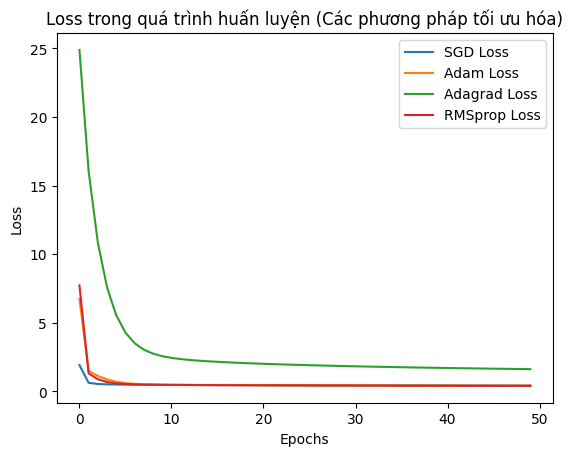


So sánh MSE giữa các phương pháp tối ưu hóa:
SGD: MSE = 0.4923499524593353
Adam: MSE = 0.5232585072517395
Adagrad: MSE = 2.0418448448181152
RMSprop: MSE = 0.4703974425792694


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adagrad, RMSprop
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

# Hàm xây dựng mô hình
def build_model(optimizer):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Layer cuối với một unit cho hồi quy
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
    return model

# Các optimizer
optimizers = {
    'SGD': SGD(),
    'Adam': Adam(),
    'Adagrad': Adagrad(),
    'RMSprop': RMSprop()
}

# Khởi tạo danh sách để lưu kết quả
results = {}

# Huấn luyện mô hình với từng phương pháp tối ưu hóa
for opt_name, optimizer in optimizers.items():
    print(f"\nĐang huấn luyện với {opt_name}...")

    model = build_model(optimizer)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Dự đoán và tính toán MSE
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[opt_name] = mse

    # Vẽ đồ thị loss theo từng epoch
    plt.plot(history.history['loss'], label=f'{opt_name} Loss')

# Hiển thị đồ thị loss
plt.title('Loss trong quá trình huấn luyện (Các phương pháp tối ưu hóa)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# In kết quả so sánh MSE giữa các phương pháp
print("\nSo sánh MSE giữa các phương pháp tối ưu hóa:")
for opt_name, mse in results.items():
    print(f"{opt_name}: MSE = {mse}")

# **Câu 2**

# **Tạo bộ Datasets về Stock_Price**

In [ ]:
import pandas as pd
import numpy as np
import random

# Số lượng hàng
num_rows = 2000

# Tạo dữ liệu mẫu
date_range = pd.date_range(start="2015-01-01", periods=num_rows)
industry_types = random.choices(['Tech', 'Finance', 'Health', 'Energy', 'Retail'], k=num_rows)
opening_prices = np.round(np.random.uniform(50, 500, num_rows), 2)
closing_prices = np.round(opening_prices + np.random.uniform(-10, 10, num_rows), 2)
volumes = np.random.randint(1000, 1000000, num_rows)
gdp_growth = np.round(np.random.uniform(-2, 5, num_rows), 2)
inflation_rate = np.round(np.random.uniform(0, 10, num_rows), 2)
interest_rate = np.round(np.random.uniform(0, 5, num_rows), 2)
unemployment_rate = np.round(np.random.uniform(2, 10, num_rows), 2)
stock_market_index = np.round(np.random.uniform(2000, 10000, num_rows), 2)
months = [date.month for date in date_range]
days_of_week = [date.day_name() for date in date_range]
quarters = [(date.month - 1) // 3 + 1 for date in date_range]
day_of_year = [date.timetuple().tm_yday for date in date_range]

# Tạo DataFrame
df = pd.DataFrame({
    'date': date_range,
    'industry_type': industry_types,
    'opening_price': opening_prices,
    'closing_price': closing_prices,
    'volume': volumes,
    'gdp_growth': gdp_growth,
    'inflation_rate': inflation_rate,
    'interest_rate': interest_rate,
    'unemployment_rate': unemployment_rate,
    'stock_market_index': stock_market_index,
    'month': months,
    'day_of_week': days_of_week,
    'quarter': quarters,
    'day_of_year': day_of_year
})

# Hiển thị 5 dòng đầu tiên của dataset
print(df.head())

        date industry_type  opening_price  closing_price  volume  gdp_growth  \
0 2015-01-01        Energy         190.54         185.42   57565        4.13   
1 2015-01-02       Finance         426.16         421.24  103379        0.57   
2 2015-01-03        Retail         290.08         294.93  576331        0.75   
3 2015-01-04       Finance         356.67         357.05  499847        2.39   
4 2015-01-05       Finance         220.26         222.37  818851       -1.45   

   inflation_rate  interest_rate  unemployment_rate  stock_market_index  \
0            5.44           2.74               7.25             5219.46   
1            4.35           4.86               2.86             5036.66   
2            9.88           2.13               3.47             6293.92   
3            6.19           4.67               9.21             2276.63   
4            7.11           4.25               9.92             3924.55   

   month day_of_week  quarter  day_of_year  
0      1    Thursday   

In [ ]:
from google.colab import files

# Lưu dataset thành file CSV
file_name = "stock_price_dataset.csv"
df.to_csv(file_name, index=False)

# Tải file về
print(f"File '{file_name}' đã được tạo. Bắt đầu tải xuống...")
files.download(file_name)

File 'stock_price_dataset.csv' đã được tạo. Bắt đầu tải xuống...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Tiền xử lý dữ liệu và chọn mô hình tốt nhất**

In [85]:
from google.colab import files
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

# 1. Tải file lên từ máy tính
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2. Đọc file CSV
df = pd.read_csv(file_name)

# 3. Xóa null/nan
df.dropna(inplace=True)

# 4. Xóa duplicated
df.drop_duplicates(inplace=True)

# 5. Xóa điểm ngoại lai (theo phương pháp IQR)
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Xác định các cột số cần xử lý ngoại lai
numeric_columns = ['opening_price', 'closing_price', 'volume',
                   'gdp_growth', 'inflation_rate', 'interest_rate',
                   'unemployment_rate', 'stock_market_index']
df = remove_outliers(df, numeric_columns)

# 6. Chuẩn hóa dữ liệu
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 7. Chuyển đổi cột categorical thành dạng số (one-hot encoding)
df = pd.get_dummies(df, columns=['industry_type', 'day_of_week', 'month', 'quarter'], drop_first=True)

# 8. Chia train/test
X = df.drop(['opening_price', 'date'], axis=1)  # 'opening_price' là biến mục tiêu
y = df['opening_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Sử dụng LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

models.to_csv("lazy_regressor_results.csv")

files.download("lazy_regressor_results.csv")
print("Kết quả đã được lưu vào 'lazy_regressor_results.csv'")

Saving stock_price_dataset.csv to stock_price_dataset (4).csv


100%|██████████| 42/42 [00:06<00:00,  6.06it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2023
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 8
[LightGBM] [Info] Start training from score 0.013139
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
OrthogonalMatchingPursuitCV                  1.00       1.00  0.04        0.03
OrthogonalMatchingPursuit                    1.00       1.00  0.04        0.01
LassoLarsIC                                  1.00       1.00  0.04        0.03
SGDRegressor                                 1.00       1.00  0.04        0.04
ElasticNetCV                                 1.00       1.00  0.04        0.14
TransformedTargetRegressor                   1.00       1.00  0.04        0.02
LinearRegression            

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Kết quả đã được lưu vào 'lazy_regressor_results.csv'


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet,
                                  OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV, BayesianRidge)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,
                               ExtraTreesRegressor, BaggingRegressor)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.dummy import DummyRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Ánh xạ tên mô hình từ LazyRegressor sang sklearn
model_mapping = {
    "RandomForestRegressor": RandomForestRegressor(),
    "SVR": SVR(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "BayesianRidge": BayesianRidge(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
    "OrthogonalMatchingPursuitCV": OrthogonalMatchingPursuit(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "BaggingRegressor": BaggingRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "MLPRegressor": MLPRegressor(),
    "PLSRegression": PLSRegression(),
    "DummyRegressor": DummyRegressor(),
    "TransformedTargetRegressor": TransformedTargetRegressor(regressor=LinearRegression(), transformer=StandardScaler())
}

# Lấy tên mô hình tốt nhất
best_model_name = models.index[0]  # Sử dụng mô hình đầu tiên trong bảng kết quả

# Định nghĩa GridSearchCV với các tham số tối ưu hóa tùy theo mô hình
if best_model_name in model_mapping:
    model = model_mapping[best_model_name]
    print(f"\u0110ang sử dụng mô hình: {best_model_name}")
else:
    raise ValueError(f"Mô hình {best_model_name} không được hỗ trợ")

# Định nghĩa GridSearchCV với các tham số tối ưu hóa tùy theo mô hình
if isinstance(model, RandomForestRegressor):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif isinstance(model, SVR):
    param_grid = {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 1],
        'kernel': ['linear', 'rbf']
    }
elif isinstance(model, DecisionTreeRegressor):
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif isinstance(model, KNeighborsRegressor):
    param_grid = {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
elif isinstance(model, GradientBoostingRegressor):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    }
elif isinstance(model, AdaBoostRegressor):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }
elif isinstance(model, (Ridge, Lasso, ElasticNet)):
    param_grid = {
        'alpha': [0.01, 0.1, 1, 10, 100]
    }
elif isinstance(model, OrthogonalMatchingPursuit):
    param_grid = {
        'n_nonzero_coefs': [None, 10, 20, 30]
    }
elif isinstance(model, MLPRegressor):
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'learning_rate': ['constant', 'adaptive']
    }
elif isinstance(model, ExtraTreesRegressor):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
elif isinstance(model, TransformedTargetRegressor):
    param_grid = {
        'regressor__alpha': [0.01, 0.1, 1, 10, 100]
    }
else:
    param_grid = {}  # Nếu không có tham số tùy chỉnh

# Huấn luyện mô hình với GridSearchCV
try:
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Mô hình tối ưu
    best_model = grid_search.best_estimator_
    print(f"Mô hình tối ưu hóa: {best_model}")

    # Dự đoán và đánh giá mô hình
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")
except Exception as e:
    print(f"Lỗi khi chạy GridSearchCV: {e}")

Đang sử dụng mô hình: OrthogonalMatchingPursuitCV
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mô hình tối ưu hóa: OrthogonalMatchingPursuit()
Mean Squared Error (MSE): 0.0019618440256418215
R-squared (R2): 0.998001179537008


# **Vẽ đồ thị**

Mô hình tốt nhất: OrthogonalMatchingPursuitCV


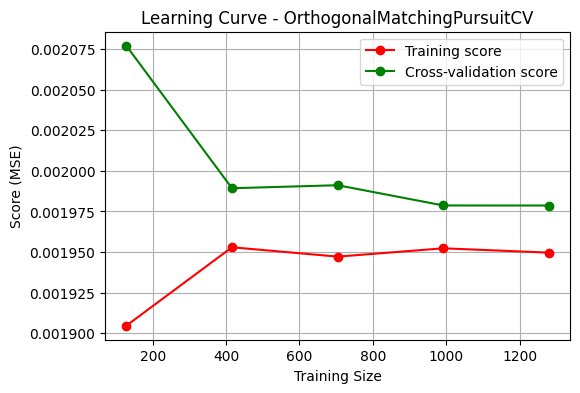

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import *
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.compose import TransformedTargetRegressor
import matplotlib.pyplot as plt
import numpy as np

# Hàm vẽ Learning Curve
def plot_learning_curve(model, X, y, title, cv=5, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), verbose=0
    )

    train_scores_mean = -train_scores.mean(axis=1)  # Chuyển sang giá trị dương
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("Score (MSE)")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Lấy mô hình tốt nhất từ LazyRegressor
best_model_name = models.index[0]  # Tên mô hình tốt nhất từ LazyRegressor
print(f"Mô hình tốt nhất: {best_model_name}")

# Tạo mô hình tương ứng với tên
if best_model_name == "RandomForestRegressor":
    model = RandomForestRegressor()
elif best_model_name == "SVR":
    model = SVR()
elif best_model_name == "DecisionTreeRegressor":
    model = DecisionTreeRegressor()
elif best_model_name == "LinearRegression":
    model = LinearRegression()
elif best_model_name == "Ridge":
    model = Ridge()
elif best_model_name == "Lasso":
    model = Lasso()
elif best_model_name == "ElasticNet":
    model = ElasticNet()
elif best_model_name == "BayesianRidge":
    model = BayesianRidge()
elif best_model_name == "OrthogonalMatchingPursuit":
    model = OrthogonalMatchingPursuit()
elif best_model_name == "OrthogonalMatchingPursuitCV":
    model = OrthogonalMatchingPursuitCV()
elif best_model_name == "KNeighborsRegressor":
    model = KNeighborsRegressor()
elif best_model_name == "GradientBoostingRegressor":
    model = GradientBoostingRegressor()
elif best_model_name == "AdaBoostRegressor":
    model = AdaBoostRegressor()
elif best_model_name == "ExtraTreesRegressor":
    model = ExtraTreesRegressor()
elif best_model_name == "BaggingRegressor":
    model = BaggingRegressor()
elif best_model_name == "GaussianProcessRegressor":
    model = GaussianProcessRegressor()
elif best_model_name == "MLPRegressor":
    model = MLPRegressor()
elif best_model_name == "PLSRegression":
    model = PLSRegression()
elif best_model_name == "DummyRegressor":
    model = DummyRegressor()
elif best_model_name == "TransformedTargetRegressor":
    model = TransformedTargetRegressor()
else:
    raise ValueError(f"Mô hình {best_model_name} không hỗ trợ.")

# Vẽ Learning Curve cho mô hình tốt nhất
plot_learning_curve(
    model,
    X_train,
    y_train,
    title=f"Learning Curve - {best_model_name}",
    cv=5
)

# **FFNN**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import numpy as np

# Khởi tạo mô hình FFNN
def build_ffnn(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Layer cuối cùng với 1 unit, không activation
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình
input_dim = X_train.shape[1]
ffnn_model = build_ffnn(input_dim)
ffnn_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Dự đoán và đánh giá
y_pred = ffnn_model.predict(X_test)
mse_ffnn = mean_squared_error(y_test, y_pred)
rmse_ffnn = np.sqrt(mse_ffnn)
mae_ffnn = mean_absolute_error(y_test, y_pred)
r2_ffnn = r2_score(y_test, y_pred)
explained_var_ffnn = explained_variance_score(y_test, y_pred)

# In kết quả
print(f"FFNN Metrics:\nMSE: {mse_ffnn}\nRMSE: {rmse_ffnn}\nMAE: {mae_ffnn}\nR²: {r2}\nExplained Variance: {explained_var_ffnn}")

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.5446 - mse: 4.5446 - val_loss: 0.8689 - val_mse: 0.8689
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6759 - mse: 0.6759 - val_loss: 0.4750 - val_mse: 0.4750
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3667 - mse: 0.3667 - val_loss: 0.1652 - val_mse: 0.1652
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1375 - mse: 0.1375 - val_loss: 0.0723 - val_mse: 0.0723
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.013

# **RNN**

In [ ]:
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

# Chuẩn hóa dữ liệu đầu vào cho RNN
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape dữ liệu cho LSTM (dạng [samples, time steps, features])
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Xây dựng mô hình RNN
def build_rnn(input_shape):
    model = Sequential()
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Layer cuối với 1 unit
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình
input_shape = (X_train_rnn.shape[1], X_train_rnn.shape[2])
rnn_model = build_rnn(input_shape)
rnn_model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Dự đoán và đánh giá
y_pred_rnn = rnn_model.predict(X_test_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)
explained_var_rnn = explained_variance_score(y_test, y_pred_rnn)

# In kết quả
print(f"RNN Metrics:\nMSE: {mse_rnn}\nRMSE: {rmse_rnn}\nMAE: {mae_rnn}\nR²: {r2_rnn}\nExplained Variance: {explained_var_rnn}")

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.0004 - mse: 1.0004 - val_loss: 0.9171 - val_mse: 0.9171
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.8636 - mse: 0.8636 - val_loss: 0.2388 - val_mse: 0.2388
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1853 - mse: 0.1853 - val_loss: 0.0521 - val_mse: 0.0521
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0916 - mse: 0.0916 - val_loss: 0.0420 - val_mse: 0.0420
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0811 - mse: 0.0811 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0794 - mse: 0.0794 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0657 - mse: 0.0657 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - lo

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Khởi tạo và huấn luyện mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
explained_var_lr = explained_variance_score(y_test, y_pred_lr)

# In kết quả đánh giá
print(f"Linear Regression Metrics:\nMSE: {mse_lr}\nRMSE: {rmse_lr}\nMAE: {mae_lr}\nR²: {r2_lr}\nExplained Variance: {explained_var_lr}")

Linear Regression Metrics:
MSE: 0.0019877793220660573
RMSE: 0.04458451886099094
MAE: 0.03877742402652215
R²: 0.9979747554173893
Explained Variance: 0.9979814351705155


# **SVM**

In [ ]:
from sklearn.svm import SVR

# Khởi tạo và huấn luyện mô hình SVM
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
explained_var_svm = explained_variance_score(y_test, y_pred_svm)

# In kết quả đánh giá
print(f"SVM Metrics:\nMSE: {mse_svm}\nRMSE: {rmse_svm}\nMAE: {mae_svm}\nR²: {r2_svm}\nExplained Variance: {explained_var_svm}")

SVM Metrics:
MSE: 0.8988112095639821
RMSE: 0.9480565434424163
MAE: 0.80925861492889
R²: 0.0842481794874701
Explained Variance: 0.09353707835243397


# **Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Khởi tạo và huấn luyện mô hình Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
explained_var_dt = explained_variance_score(y_test, y_pred_dt)

# In kết quả đánh giá
print(f"Decision Tree Metrics:\nMSE: {mse_dt}\nRMSE: {rmse_dt}\nMAE: {mae_dt}\nR²: {r2_dt}\nExplained Variance: {explained_var_dt}")

Decision Tree Metrics:
MSE: 0.004208843878478506
RMSE: 0.06487560310685755
MAE: 0.05232540954613809
R²: 0.9957118286877625
Explained Variance: 0.9957123648265628


# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Khởi tạo và huấn luyện mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
explained_var_rf = explained_variance_score(y_test, y_pred_rf)

# In kết quả đánh giá
print(f"Random Forest Metrics:\nMSE: {mse_rf}\nRMSE: {rmse_rf}\nMAE: {mae_rf}\nR²: {r2_rf}\nExplained Variance: {explained_var_rf}")

Random Forest Metrics:
MSE: 0.002290128454685767
RMSE: 0.047855286590780824
MAE: 0.040093777241897464
R²: 0.9976667076697859
Explained Variance: 0.9976672200635351


In [ ]:
# In kết quả các mô hình
print("\nModel Comparison:")
print(f"Linear Regression - MSE: {mse_lr}, RMSE: {rmse_lr}, MAE: {mae_lr}, R²: {r2_lr}, Explained Variance: {explained_var_lr}")
print(f"SVM - MSE: {mse_svm}, RMSE: {rmse_svm}, MAE: {mae_svm}, R²: {r2_svm}, Explained Variance: {explained_var_svm}")
print(f"Decision Tree - MSE: {mse_dt}, RMSE: {rmse_dt}, MAE: {mae_dt}, R²: {r2_dt}, Explained Variance: {explained_var_dt}")
print(f"Random Forest - MSE: {mse_rf}, RMSE: {rmse_rf}, MAE: {mae_rf}, R²: {r2_rf}, Explained Variance: {explained_var_rf}")


Model Comparison:
Linear Regression - MSE: 0.0019877793220660573, RMSE: 0.04458451886099094, MAE: 0.03877742402652215, R²: 0.9979747554173893, Explained Variance: 0.9979814351705155
SVM - MSE: 0.8988112095639821, RMSE: 0.9480565434424163, MAE: 0.80925861492889, R²: 0.0842481794874701, Explained Variance: 0.09353707835243397
Decision Tree - MSE: 0.004208843878478506, RMSE: 0.06487560310685755, MAE: 0.05232540954613809, R²: 0.9957118286877625, Explained Variance: 0.9957123648265628
Random Forest - MSE: 0.002290128454685767, RMSE: 0.047855286590780824, MAE: 0.040093777241897464, R²: 0.9976667076697859, Explained Variance: 0.9976672200635351


# **Dùng Early Stopping và Dropout để giảm bớt Overfitting cho FFNN**

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 79.3218 - mse: 79.3218 - val_loss: 1.1712 - val_mse: 1.1712
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.0736 - mse: 10.0736 - val_loss: 1.2368 - val_mse: 1.2368
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.0671 - mse: 6.0671 - val_loss: 1.2131 - val_mse: 1.2131
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4639 - mse: 4.4639 - val_loss: 1.3466 - val_mse: 1.3466
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1101 - mse: 4.1101 - val_loss: 1.0521 - val_mse: 1.0521
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.8784 - mse: 2.8784 - val_loss: 1.0922 - val_mse: 1.0922
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3365 - mse: 2.3365 - val_loss: 1.1380 - val_mse: 1.1380
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2640 - mse: 2.2640 - val_loss: 1.0328 - val_mse: 1.0328
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss

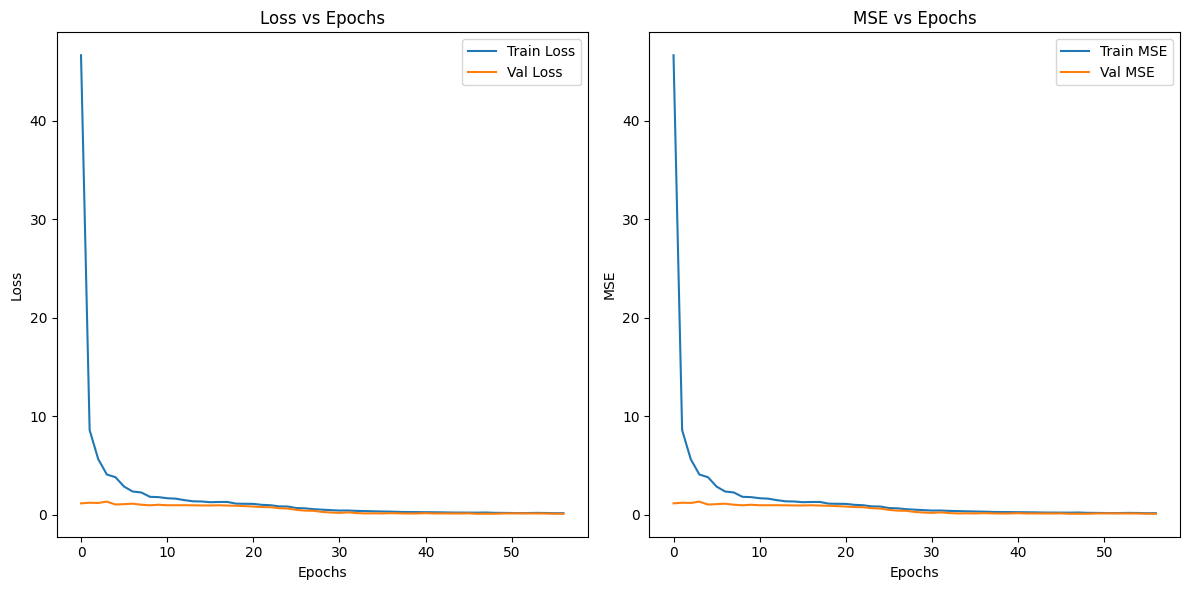

In [ ]:
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Khởi tạo mô hình FFNN với EarlyStopping
def build_ffnn(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))  # Dropout để ngăn ngừa overfitting
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Layer cuối cùng với 1 unit, không activation
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình
input_dim = X_train.shape[1]
ffnn_model = build_ffnn(input_dim)
history = ffnn_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,
                         callbacks=[early_stopping], verbose=1)

# Dự đoán và đánh giá
y_pred = ffnn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

# In kết quả đánh giá
print(f"FFNN Metrics:\nMSE: {mse}\nRMSE: {rmse}\nMAE: {mae}\nR²: {r2}\nExplained Variance: {explained_var}")

# Vẽ đồ thị loss và MSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Val MSE')
plt.title('MSE vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

# **Dùng EarlyStopping và Dropout cho mô hình LSTM của RNN**

Shape of X_train_rnn: (1600, 1, 32)
Shape of X_test_rnn: (400, 1, 32)
Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.9993 - mse: 0.9993 - val_loss: 0.9398 - val_mse: 0.9398
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9460 - mse: 0.9460 - val_loss: 0.6696 - val_mse: 0.6696
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5388 - mse: 0.5388 - val_loss: 0.0735 - val_mse: 0.0735
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1784 - mse: 0.1784 - val_loss: 0.0675 - val_mse: 0.0675
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1221 - mse: 0.1221 - val_loss: 0.0392 - val_mse: 0.0392
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0992 - mse: 0.0992 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0886 - mse: 0.0886 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0796 - mse: 0.0796 - val_loss: 0.0276 - val_

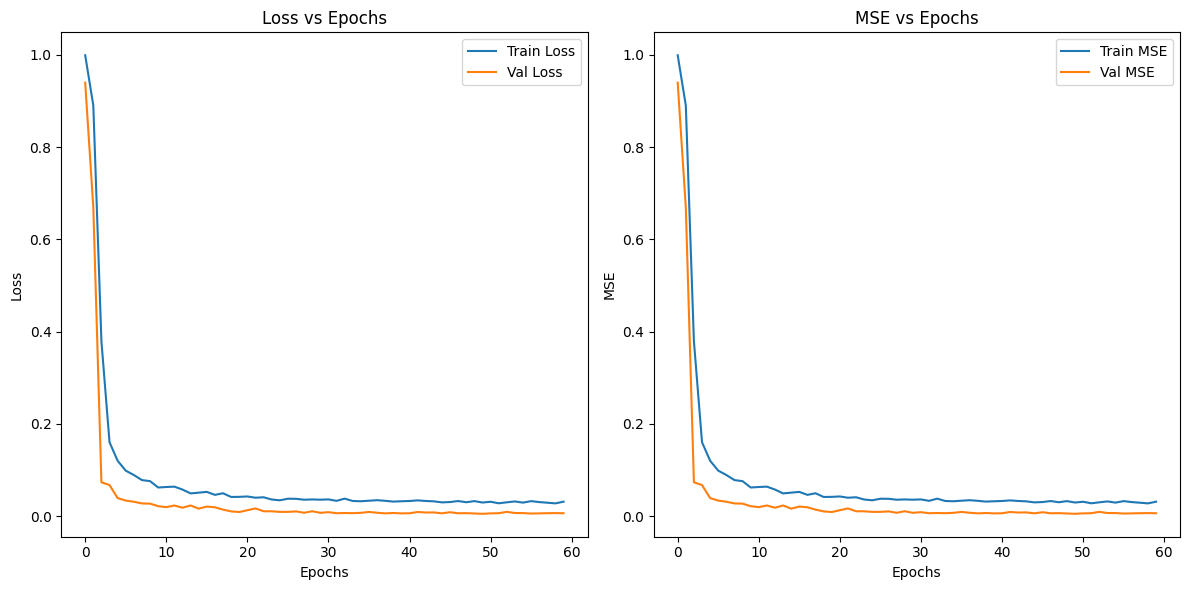

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Chuẩn hóa dữ liệu đầu vào cho RNN
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape dữ liệu cho LSTM (dạng [samples, time steps, features])
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

print(f"Shape of X_train_rnn: {X_train_rnn.shape}")  # Expected shape: (1600, 32, 1)
print(f"Shape of X_test_rnn: {X_test_rnn.shape}")    # Expected shape: (400, 32, 1)

# Xây dựng mô hình RNN với LSTM
def build_rnn(input_shape):
    model = Sequential()

    # LSTM layer đầu tiên
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))  # Dropout để giảm overfitting

    # LSTM layer thứ hai
    model.add(LSTM(64, activation='relu'))
    model.add(Dropout(0.3))

    # Layer Dense (output)
    model.add(Dense(1))  # Một unit đầu ra cho regression task
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])  # Compile model
    return model

# Tạo đối tượng EarlyStopping để ngừng huấn luyện khi mất mát không giảm
early_stopping_rnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình RNN
rnn_model = build_rnn((1, 32))  # Truyền đúng input_shape là (time_steps, features), có thể chỉnh sửa cho phù hợp (1,32) hoặc (1,10)
history_rnn = rnn_model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=100, batch_size=32,
                            callbacks=[early_stopping_rnn], verbose=1)

# Dự đoán và đánh giá mô hình
y_pred_rnn = rnn_model.predict(X_test_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)
explained_var_rnn = explained_variance_score(y_test, y_pred_rnn)

# In kết quả đánh giá
print(f"RNN Metrics:\nMSE: {mse_rnn}\nRMSE: {rmse_rnn}\nMAE: {mae_rnn}\nR²: {r2_rnn}\nExplained Variance: {explained_var_rnn}")

# Vẽ đồ thị loss và MSE
plt.figure(figsize=(12, 6))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Val Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MSE graph
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['mse'], label='Train MSE')
plt.plot(history_rnn.history['val_mse'], label='Val MSE')
plt.title('MSE vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# Tinh chỉnh layout và hiển thị
plt.tight_layout()
plt.show()

# **So sánh và đánh giá các mô hình**

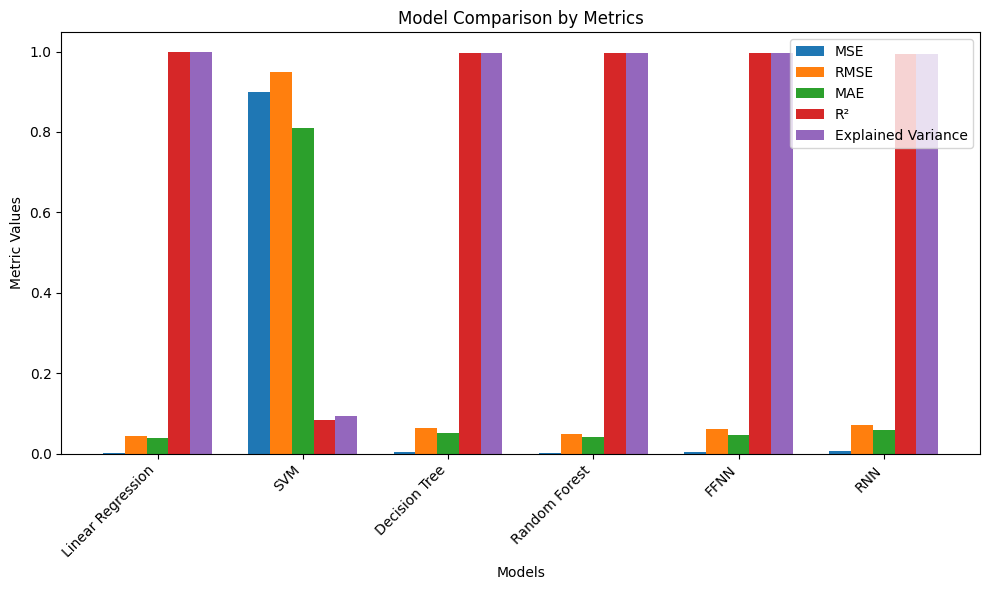

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo các giá trị đánh giá cho mỗi mô hình (theo kết quả đã tính toán ở trên)
metrics = ['MSE', 'RMSE', 'MAE', 'R²', 'Explained Variance']
model_names = ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest', 'FFNN', 'RNN']

# Tạo mảng 2D chứa các giá trị đánh giá cho từng mô hình và chỉ số
results = np.array([
    [mse_lr, rmse_lr, mae_lr, r2_lr, explained_var_lr],
    [mse_svm, rmse_svm, mae_svm, r2_svm, explained_var_svm],
    [mse_dt, rmse_dt, mae_dt, r2_dt, explained_var_dt],
    [mse_rf, rmse_rf, mae_rf, r2_rf, explained_var_rf],
    [mse_ffnn, rmse_ffnn, mae_ffnn, r2_ffnn, explained_var_ffnn],
    [mse_rnn, rmse_rnn, mae_rnn, r2_rnn, explained_var_rnn]
])

# Vẽ biểu đồ so sánh
fig, ax = plt.subplots(figsize=(10, 6))

# Vị trí cho các mô hình
x = np.arange(len(model_names))

# Chiều rộng của các cột
width = 0.15

# Tạo các cột cho từng chỉ số
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, results[:, i], width, label=metric)

# Thêm nhãn và tiêu đề
ax.set_xlabel('Models')
ax.set_ylabel('Metric Values')
ax.set_title('Model Comparison by Metrics')
ax.set_xticks(x + width * 2)  # Đặt tên mô hình ở giữa các nhóm cột
ax.set_xticklabels(model_names, rotation=45, ha="right")

# Thêm legend
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# **Câu 3**

In [ ]:
!pip install tensorflow matplotlib

In [ ]:
!pip install tensorflow matplotlib numpy

Đường dẫn Bộ Dataset: https://www.kaggle.com/c/cifar-10/data


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Tải bộ dữ liệu CIFAR-10 từ TensorFlow
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Hiển thị thông tin bộ dữ liệu
print(f"Training data shape: {train_images.shape}")
print(f"Testing data shape: {test_images.shape}")

# Chuẩn hóa dữ liệu (giảm giá trị pixel từ 0-255 về 0-1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Các nhãn cần được chuyển thành dạng one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [ ]:
from tensorflow.keras import layers, models

# Mô hình CNN
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 82ms/step - accuracy: 0.3777 - loss: 1.7209 - val_accuracy: 0.5749 - val_loss: 1.2116
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 167s 98ms/step - accuracy: 0.5954 - loss: 1.1546 - val_accuracy: 0.6170 - val_loss: 1.0917
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.6566 - loss: 0.9833 - val_accuracy: 0.6684 - val_loss: 0.9539
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 76ms/step - accuracy: 0.6924 - loss: 0.8910 - val_accuracy: 0.6692 - val_loss: 0.9650
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.7140 - loss: 0.8204 - val_accuracy: 0.6815 - val_loss: 0.9320
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 77ms/step - accuracy: 0.7373 - loss: 0.7640 - val_accuracy: 0.6967 - val_loss: 0.8886
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 74ms/step - accuracy: 0.7454 - loss: 0.7325 - val_accuracy: 0.7077 - val_loss: 0.8611
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 77ms/step - accuracy: 

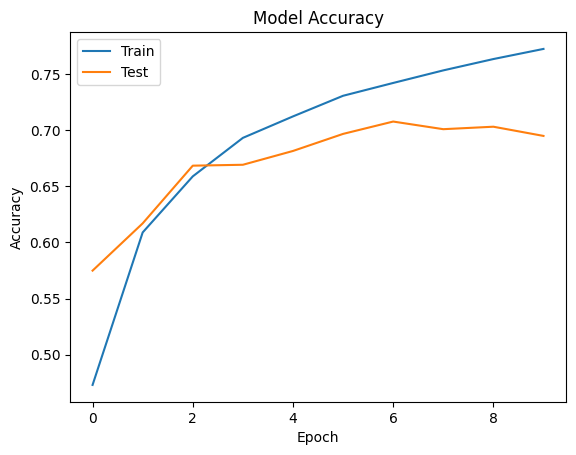

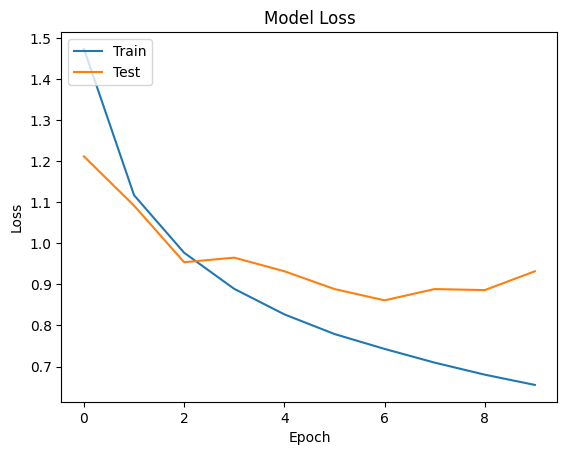

In [ ]:
# Trực quan hóa độ chính xác
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Trực quan hóa tổn thất
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
5


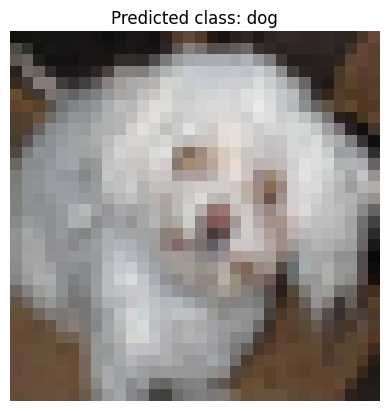

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lấy một hình ảnh ngẫu nhiên từ bộ dữ liệu CIFAR-10
index = 1000
img = test_images[index:index + 1]

# Dự đoán lớp của hình ảnh
predictions = model.predict(img)

# Lấy lớp có xác suất cao nhất
predicted_class = np.argmax(predictions)
print(predicted_class)

# Danh sách tên các lớp
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Hiển thị ảnh với chất lượng cao
plt.imshow(test_images[index])
plt.title(f"Predicted class: {class_names[predicted_class]}")
plt.axis('off')
plt.show()